<h1>Education & Career Success</h1>

<p>Overview: This dataset explores the relationship between academic performance and career success. It includes 5000 records of students' educational backgrounds, skills, and career outcomes. The dataset can be used for various analyses, such as predicting job success based on education, identifying key factors influencing salaries, and understanding the role of networking and internships in career growth.</p>

<a href="https://www.kaggle.com/datasets/adilshamim8/education-and-career-success">Dataset Source</a>

In [103]:
import pandas as pd

# load data
df = pd.read_csv('./education_career_success.csv')

pd.set_option('display.expand_frame_repr', False)
print(df.head())

  Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  University_GPA    Field_of_Study  Internships_Completed  Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  Job_Offers  Starting_Salary  Career_Satisfaction  Years_to_Promotion Current_Job_Level  Work_Life_Balance Entrepreneurship
0     S00001   24    Male             3.58       1052                 291            3.96              Arts                      3                   7               2                  9                 8           5          27200.0                    4                   5             Entry                  7               No
1     S00002   21   Other             2.52       1211                 112            3.63               Law                      4                   7               3                  8                 1           4          25000.0                    1                   1               Mid                  7               No
2     S00003   2

In [104]:
# initial exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

<p>Dataset contains 5,000 rows and 20 columns.</p>

<h3>Goals:</h3>
<ol>
<li>Look at relationship between high school performance and where go to college, college performance, and major.</li>
<li>Look at relationship between major and GPA and internships.</li>
<li>Look at relationship between college performance and job offers and starting salary.</li>
<li>Look at relationship between major and career statisfaction and work life balance.</li>
<li>Look at relationship between gender and major and starting salary.</li>
</ol>

In [105]:
# check for missing values
if df.isna().any().any():
    print("There are missing values in the data.")
else:
    print("There are NO missing values in the data.")

# check for duplicate rows
if df.duplicated().any():
    print("There are duplicate rows in the data.")
else:
    print("There are NO duplicate rows in the data.")

There are NO missing values in the data.
There are NO duplicate rows in the data.


Age                       0
High_School_GPA           0
SAT_Score                 0
University_Ranking        0
University_GPA            0
Internships_Completed     0
Projects_Completed        0
Certifications            0
Soft_Skills_Score         0
Networking_Score          0
Job_Offers                0
Starting_Salary          12
Career_Satisfaction       0
Years_to_Promotion        0
Work_Life_Balance         0
dtype: int64


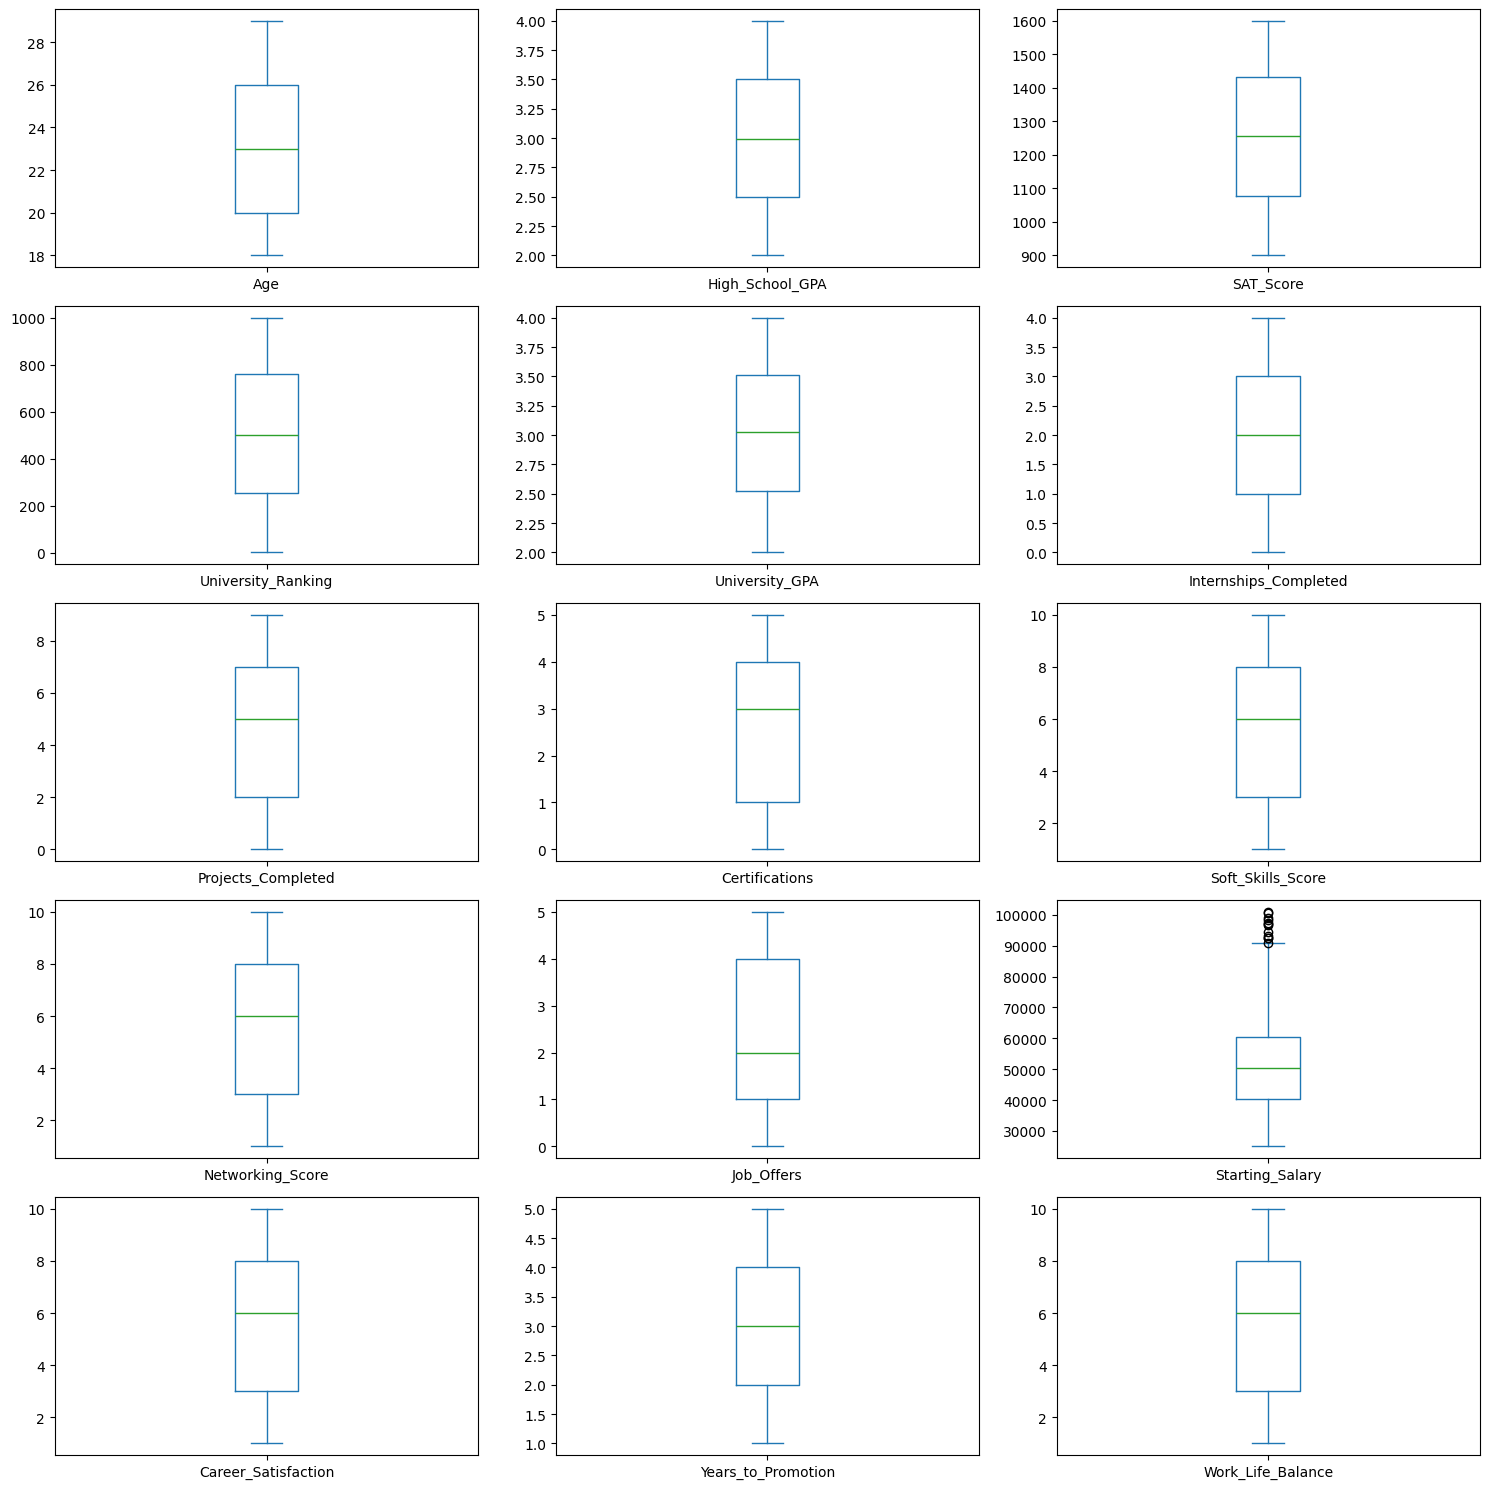

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# check for outliers using iqr
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

numeric_df = df.select_dtypes(include=np.number)
outliers = detect_outliers_iqr(numeric_df)
print(outliers.sum())

# create boxplot for outlier visualization
numeric_df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 15))
plt.tight_layout()
plt.show()



<p>Only Starting_Salary has outliers. There are 12 high outliers.</p>

<h2>High School Performance & College Stats</h2>

<p>High School Performance = High_School_GPA, SAT_Score</p>
<p>College Stats = University_Ranking, University_GPA, Field_of_Study</p>

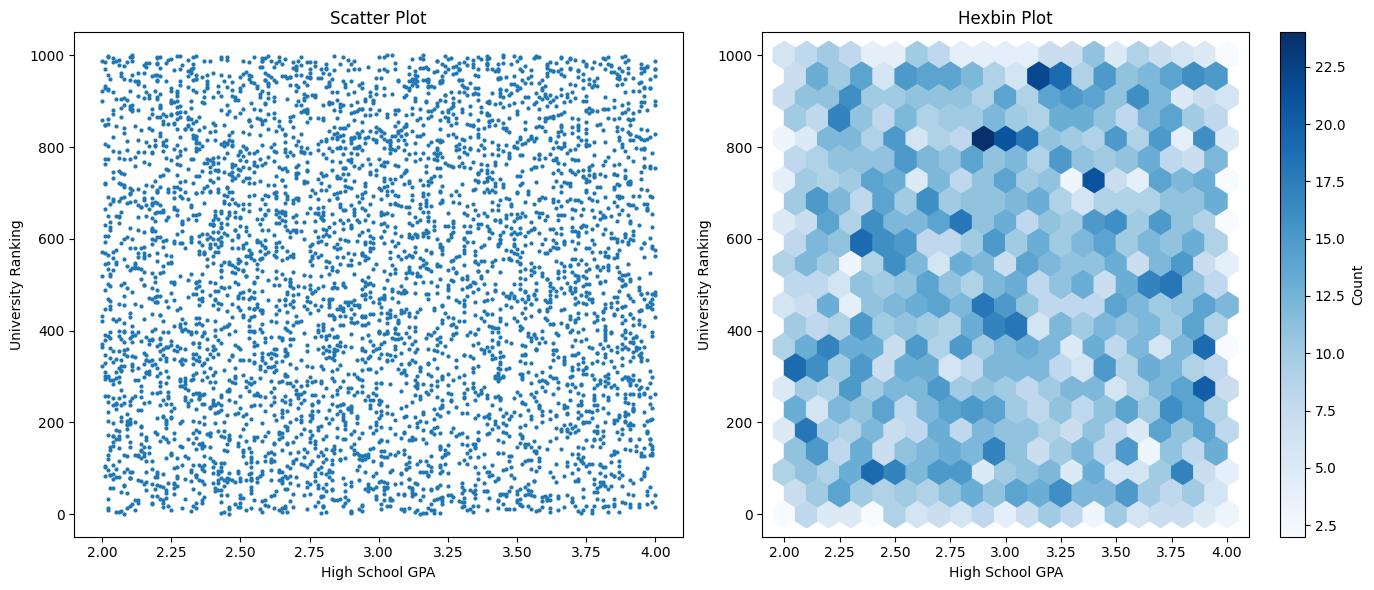

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(df['High_School_GPA'], df['University_Ranking'], s=4)
axes[0].set_title("Scatter Plot")
axes[0].set_xlabel("High School GPA")
axes[0].set_ylabel("University Ranking")

hb = axes[1].hexbin(df['High_School_GPA'], df['University_Ranking'], gridsize=20, cmap='Blues')
axes[1].set_title("Hexbin Plot")
axes[1].set_xlabel("High School GPA")
axes[1].set_ylabel("University Ranking")

fig.colorbar(hb, ax=axes[1], label="Count")

plt.tight_layout()
plt.show()